In [3]:

import random
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

class Global_vars:
    """
    Storage of global variables. No object instance created.
    """

    # Set up counter for number for patients entering simulation
    patient_count = 0


class Patient:
    """The Patient class is for patient objects. Each patient is an instance of
    this class. This class also holds a static dictionary which holds all
    patient objects (a patient is removed after exiting ED).

    Methods are:

    __init__: constructor for new patient
    """

    def __init__(self):
        """Constructor for new patient object.
        """

        # Increment global counts of patients
        Global_vars.patient_count += 1

        # Set patient id and priority (random between 1 and 3)
        self.id = Global_vars.patient_count
        self.priority = 1
        self.site = 'breast'

        # default fractionation
        self.linac_time = 5



class Linac:
    """The Linac class is for linac objects. 

    Methods are:

    __init__: constructor for new linac
    """

    def __init__(self, number_linacs=1, hours=10, slots_per_hour=3):
        """Constructor for new patient object.
        """
        self.number_linacs = number_linacs
        self.hours = hours
        self.slots_per_hour = slots_per_hour
        # slots on machines 
        self.max = int(self.number_linacs*self.hours*self.slots_per_hour)
        
        self.empty_slots = []
        self.patient_num = 0
        self.fractions_left = [0]*self.max
        
        self.daily_num = []
        self.queue = []

In [4]:
linacs = 6
treatment_hours = 9
slots_per_hour = 3

capacity  = 100
treatment_hours = treatment_hours*(capacity/100)

linac = Linac(linacs,treatment_hours,slots_per_hour)


# list to hold patients queue
patients = []

# generate patient starts on a Monday using mean and σ = mean/2
pts_per_week = 1
def prostate_patients():
    return np.round(np.random.normal(pts_per_week,pts_per_week/2,1))

pts_per_week = 1
def breast_patients():
    return np.round(np.random.normal(pts_per_week,pts_per_week/2,1))

pts_per_week = 1
def h_and_n():
    return np.round(np.random.normal(pts_per_week,pts_per_week/2,1))

In [3]:
def patient_weekly_intake():
    '''
    generate the weekly patient objects, setting the attributes
    '''
    patients_p = [Patient() for i in np.arange(prostate_patients())]
    for i in patients_p:
        i.priority = 0.334
        i.site = 'prostate'
        i.linac_time = 30
    patients_hn = [Patient() for i in np.arange(h_and_n())]
    for i in patients_hn:
        i.priority = 0.667
        i.site = 'head_neck'
        i.linac_time = 20
    patients_b = [Patient() for i in np.arange(breast_patients())]
    return patients_p+patients_hn+patients_b

patients = patients + patient_weekly_intake()

patients.sort(key=lambda x: getattr(x, 'priority'))
#[i.linac_time for i in patients]

In [4]:
[i.linac_time for i in patients]

[30, 30, 20, 5, 5]

In [5]:
# initilise our linac with the first tranche of patient
for i in range(linac.max ):
    if len(patients) > 0:
        # remove patient from the queue
        j = patients.pop()
        # represent each patient as a number of fraction in out linac list
        linac.fractions_left[i] = j.linac_time
        #keep tabs of all patients treated
        linac.patient_num += 1
        
linac.empty_slots.append(linac.max - linac.patient_num)

In [6]:
# loop for a set number of days
# 5 days in a week

for i in np.arange(240): # 120 = 24 weeks ~ 6 months
    # increment priority by 1%
    for j in patients:
        if j.priority < 1:
            j.priority += 0.01
            
    # every Monday new set of patients arrive
    if i == 0:
        continue
    else:    
        if i%5 ==0:
            patients = patients+patient_weekly_intake()
            patients.sort(key=lambda x: getattr(x, 'priority'))
    print([i.linac_time for i in patients])  
    print(linac.fractions_left)
    if any(np.array(linac.fractions_left) == 0):
        linac.fractions_left=np.sort(linac.fractions_left)
        space = linac.fractions_left.tolist().count(0)
        print('space')
        if space > 0:
            for j in np.arange(space):
                if len(patients) > 0:
                    k = patients.pop()
                    linac.fractions_left[j] = k.linac_time
        # space left after filling
        space = linac.fractions_left.tolist().count(0)            
    else:
        space = 0
    linac.empty_slots.append(space)    
    linac.daily_num.append(space)
    linac.queue.append(len(patients))
    linac.fractions_left -= np.array([1])
    linac.fractions_left[linac.fractions_left<0] = 0

[]
[5, 5, 20, 30, 30, 0, 0, 0, 0, 0, 0, 0]
space
[]
[ 0  0  0  0  0  0  0  4  4 19 29 29]
space
[]
[ 0  0  0  0  0  0  0  3  3 18 28 28]
space
[]
[ 0  0  0  0  0  0  0  2  2 17 27 27]
space
[30, 20, 20, 5]
[ 0  0  0  0  0  0  0  1  1 16 26 26]
space
[]
[ 4 19 19 29  0  0  0  0  0 15 25 25]
space
[]
[ 0  0  0  0  0  3 14 18 18 24 24 28]
space
[]
[ 0  0  0  0  0  2 13 17 17 23 23 27]
space
[]
[ 0  0  0  0  0  1 12 16 16 22 22 26]
space
[30, 20]
[ 0  0  0  0  0  0 11 15 15 21 21 25]
space
[]
[19 29  0  0  0  0 10 14 14 20 20 24]
space
[]
[ 0  0  0  0  9 13 13 18 19 19 23 28]
space
[]
[ 0  0  0  0  8 12 12 17 18 18 22 27]
space
[]
[ 0  0  0  0  7 11 11 16 17 17 21 26]
space
[20, 5]
[ 0  0  0  0  6 10 10 15 16 16 20 25]
space
[]
[ 4 19  0  0  5  9  9 14 15 15 19 24]
space
[]
[ 0  0  3  4  8  8 13 14 14 18 18 23]
space
[]
[ 0  0  2  3  7  7 12 13 13 17 17 22]
space
[]
[ 0  0  1  2  6  6 11 12 12 16 16 21]
space
[20, 5, 5]
[ 0  0  0  1  5  5 10 11 11 15 15 20]
space
[]
[ 4  4 19  0  4  4  9 1

[30, 30, 30, 30, 30, 30, 30]
[ 3 18  3  8  8  8  8  8 13 14 18 18]
[30, 30, 30, 30, 30, 30, 30]
[ 2 17  2  7  7  7  7  7 12 13 17 17]
[30, 30, 30, 30, 30, 30, 30]
[ 1 16  1  6  6  6  6  6 11 12 16 16]
[30, 30, 30, 30, 30, 30, 30, 30, 5]
[ 0 15  0  5  5  5  5  5 10 11 15 15]
space
[30, 30, 30, 30, 30, 30, 30]
[ 4 29  4  4  4  4  4  9 10 14 14 14]
[30, 30, 30, 30, 30, 30, 30]
[ 3 28  3  3  3  3  3  8  9 13 13 13]
[30, 30, 30, 30, 30, 30, 30]
[ 2 27  2  2  2  2  2  7  8 12 12 12]
[30, 30, 30, 30, 30, 30, 30]
[ 1 26  1  1  1  1  1  6  7 11 11 11]
[30, 30, 30, 30, 30, 30, 30, 30]
[ 0 25  0  0  0  0  0  5  6 10 10 10]
space
[30, 30]
[29 29 29 29 29 29  4  5  9  9  9 24]
[30, 30]
[28 28 28 28 28 28  3  4  8  8  8 23]
[30, 30]
[27 27 27 27 27 27  2  3  7  7  7 22]
[30, 30]
[26 26 26 26 26 26  1  2  6  6  6 21]
[30, 30, 20, 5]
[25 25 25 25 25 25  0  1  5  5  5 20]
space
[30, 30, 20]
[ 4  0  4  4  4 19 24 24 24 24 24 24]
space
[30, 30]
[19  3  3  3  3 18 23 23 23 23 23 23]
[30, 30]
[18  2  2  2 

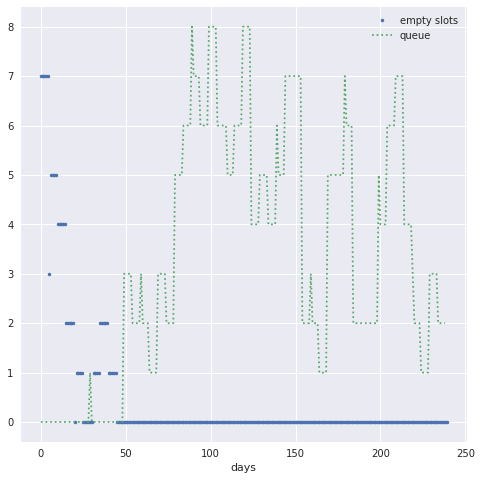

In [7]:

plt.figure(figsize=(8,8))
plt.plot(linac.empty_slots, '.', label='empty slots')

plt.plot(linac.queue, ':', label='queue')
plt.xlabel('days')
plt.legend();

In [126]:
!lscpu


Architecture:          x86_64
CPU op-mode(s):        32-bit, 64-bit
Byte Order:            Little Endian
CPU(s):                2
On-line CPU(s) list:   0,1
Thread(s) per core:    1
Core(s) per socket:    2
Socket(s):             1
Vendor ID:             GenuineIntel
CPU family:            6
Model:                 85
Model name:            Intel(R) Xeon(R) Platinum 8171M CPU @ 2.60GHz
Stepping:              4
CPU MHz:               2095.231
BogoMIPS:              4190.46
Hypervisor vendor:     Microsoft
Virtualization type:   full
L1d cache:             32K
L1i cache:             32K
L2 cache:              1024K
L3 cache:              36608K
Flags:                 fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology cpuid pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch pti fsgsbase bmi1 hle avx2 smep 

In [5]:
df = pd.read_excel('Prioritisation Categories COVID 19.xlsx', header = 1)

# drop rows if empty cells in column
df = df.dropna(subset=['Date TRF Submitted'])
# get np.array of headers
qaz = df.columns.values
# set the 6th header
qaz[5] ='location'
# replace th headers
df.columns = qaz

# select based on location
df1 = df[df['location'] == 'SJH']
df2 = df[df['location'] == 'BH']
df3 = df[df['location'] == 'SLH']

# make a completely new dataframe
df4 = pd.DataFrame(df3.values, columns = df3.columns)
# format the date into a proper datetime object
df4['Date TRF Submitted'] = pd.to_datetime( df4['Date TRF Submitted'], format='%d.%m.%y')

df5 = df4['Suggested Priority'].copy()

df4['Suggested Priority'].where(~np.array(['LP' in i for i in df5]) ,3, inplace = True)
df4['Suggested Priority'].where(~np.array(['MP' in i for i in df5]) ,2, inplace = True)
df4['Suggested Priority'].where(~np.array(['HP' in i for i in df5]) ,1, inplace = True)

# remove columns not interested in
df4.drop(df4.columns[[1, 5, 7, 8]], axis = 1, inplace = True) 
# not interested in these either
df4.drop(['PALL', 'Radical'], axis =1, inplace=True)

################################################## PALLIATIVE decision
# keep only priority 1,2 patients
# df4 = df4[df4['Suggested Priority'] != 3]

# rename columns to simply labels
df4.columns = ['date', 'priority', 'fractions']

# determine a dataframe of the days since referral
days = pd.DataFrame([(pd.Timestamp.today()-i).days for i in df4.date])

# insert days column into out main dataframe
df4.insert(1,'days', days.values, True)

In [6]:
# I will use the inverse of the priority number to set a weighting factor
# to make category two parients have less weight lets invert the priority number

# 1/df4.priority

# 15 workdays is 19 days, lets say 20  
# increment weighting by a 20th each day for the priority 1 patients,
# so after 20 days they have a weighting of 2
# we will increment the priority 2 patients so they also reach 2 after 20 days
# but will wll do this exponentially

# exp(0) is 1, so we require exp(20*γ) - 0.5 = 2,
# ie γ = log(2.5)/20 = 0.0458145

In [7]:
def new_priority(priority, days):
    if priority == 1:
        weight = 1/priority + (days/20)
    elif priority == 2:
        if days > 19:
            # the - 30th ensures cat 1 patients on same day remain weighted higher
            weight = 1 + days/20 - 1/30
        else:
            weight = -0.5 + np.exp(days*np.log(2.5)/20)
    elif priority == 3:
        weight = 1/priority + (days/60)
    
    return weight

np_priority  = np.vectorize(new_priority)

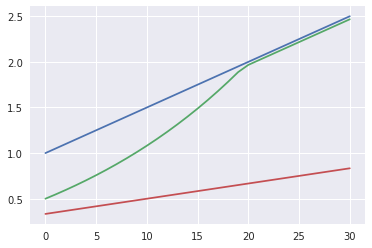

In [8]:
delay = np.arange(31)
q1 = np_priority(np.array([1]*31),delay)
q2 = np_priority(np.array([2]*31),delay)
q3 = np_priority(np.array([3]*31),delay)

plt.plot(q1)
plt.plot(q2)
plt.plot(q3)

In [ ]:
weight = np_priority(df4.priority, df4.days)

# insert weight column into our main dataframe
df4.insert(2,'weight', weight, True)
# sort by weight and fractions
df4.sort_values(by=['weight', 'fractions'], ascending=[False,True], inplace=True)
# reset the index of the rows since they get sorted as well
df4 = df4.reset_index(drop=True)



[extension of treatments paper](https://www.sciencedirect.com/science/article/abs/pii/S1507136719300185)

In [11]:
################################ to simulate a gap per patient
## df4.fractions += 1
from scipy.optimize import curve_fit

gaps =np.load('gap_freq.npy')
(a,λ), pcov = curve_fit(lambda days,a,λ: a*np.exp(-λ*days),gaps[:,0]-0.5,gaps[:,1], p0 = (30,0.05))

adder = lambda s1, s2: s1 + s2
df4.fractions = df4.fractions.combine( pd.Series((np.random.exponential(1/λ,df4.shape[0])).astype('int') ), adder )

weekly_intake = [df4]*120

In [12]:
# loop for a set number of days
# 5 days in a week

# create empty an dataframe
patients = pd.DataFrame(columns = df4.columns)

# loop for a set number of days
for i in np.arange(120): # 120 = 24 weeks ~ 6 months

    if i%5 ==0: # ie if it is a Monday we need to intake a new supple of patients
        patients = pd.concat([patients,weekly_intake[i]])
        patients.sort_values(by=['weight', 'fractions'], ascending=[False,True], inplace=True)
        patients = patients.reset_index(drop=True) # this resets the all the row index labels from zero at the top                
                         
    print(patients.fractions.values.T)  # list of patients awaiting a start on a Monday             

    # count spaces, sort them keeping empty spaces to the left
    if any(np.array(linac.fractions_left) == 0):
        linac.fractions_left=np.sort(linac.fractions_left)
        space = linac.fractions_left.tolist().count(0)
        print('space')
        if i%5 in [0,1]: # added to simulate only Mon,Tues starts
            if space > 0:
                for j in np.arange(space):
                    if patients.shape[0] > 0:
                        k = pop(patients, 0, axis=0) # remove a patient 
                        patients = patients.reset_index(drop=True) # reset index, otherwise 0 index disappears
                        linac.fractions_left[j] = k.fractions # add patient fractions to the linac
        # space left after filling
        space = linac.fractions_left.tolist().count(0)            
    else:
        space = 0
    print(linac.fractions_left)        
    linac.empty_slots.append(space)    
    linac.daily_num.append(space)
    linac.queue.append(patients.shape[0])
    linac.fractions_left -= np.array([1]) # treat all the fractions, ie subtract 1.
    linac.fractions_left[linac.fractions_left<0] = 0 # if any are negative, return to zero
    
    # increment priority
    if patients.shape[0] > 0:
        patients.days += 1
        weight = np_priority(patients.priority, patients.days)
        patients.weight = weight
        


[6.0 20.0 27.0 35.0 33.0 1.0 4.0 6.0 20.0 29.0 33.0 37.0 2.0 3.0 39.0 25.0
 27.0 30.0 18.0 27.0 43.0 49.0 21.0 30.0 6.0 8.0 10.0 9.0 5.0 5.0 11.0
 29.0 5.0 6.0 6.0 17.0 18.0 19.0]
space
[ 6 20 27 35 33  1  4  6 20 29 33 37  2  3 39 25 27 30 18 27 43 49 21 30
  6  8 10  9  5  5 11 29  5  6  6 17 18 19  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[]
space
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 

[ 6 20 27 35 33  1  4  6 20 29 33 37  2  3 39 25 27 30 18 27 43 49 21 30
  6  8 10  9  5  5 11 29  5  6  6 17 18 19  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1
  1  1  1  1  1  2  3  3  3  4  4  5  5  5  5  6  6  7  7  7  7  8  8  9
  9  9 10 10 10 10 10 11 12 12 12 12 13 13 13 13 14 14 14 15 15 15 15 15
 15 16 17 17 17 17 18 18 19 19 19 20 20 20 20 22 22 22 22 23 23 23 24 24
 24 25 25 25 27 28 28 28 29 29 30 32 33 34 34 38 39 44]
[]
space
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  2  2  2  2  3  3
  3  4  4  4  4  4  4  4  5  5  5  5  5  5  5  6  6  6  6  7  7  7  8  8
  8  8  9  9  9  9  9  9 10 10 11 11 11 11 12 12 12 12 13 13 13 14 14 14
 14 14 14 15 16 16 16 16 16 17 17 17 17 18 18 18 18 19 19 19 19 19 19 20
 21 21 21 21 22 22 22 23 23 23 24 24 24 24 26 26 26 26 27 27 27 28 28 28
 28 29 29 29 31 32 32 32 33 33 34 36 37 38 38 42 43 48]
[]


space
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1
  1  1  1  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4
  4  4  5  5  5  5  5  6  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  8
  8  9  9 10 10 10 10 10 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 13
 14 15 15 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 18 19 20
 20 20 20 21 21 21 22 22 22 22 23 23 23 23 25 25 25 25 26 26 26 27 27 27
 27 28 28 28 30 31 31 31 32 32 33 35 36 37 37 41 42 47]
[]
space
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3
  3  3  4  4  4  4  4  5  5  5  5  5  5  6  6  6  6  6  7  7  7  7  7  7
  7  8  8  9  9  9  9  9 10 10 10 10 10 11 11 11 11 11 12 12 12 12 12 12
 13 14 14 14 14 14 15 15 15 15 15 16 16 16 16 16 17 17 17 17 17 17 18 19
 19 19 19 20 20 20 21 21 21 21 22 22 22 22 24 24 24 24 25 25 25 26 26 26
 26 27 27 27 29 30 30 30 31 31 32 34 35 36 36 40 41 4

[6.0 20.0 27.0 35.0 33.0 1.0 4.0 6.0 20.0 29.0 33.0 37.0 2.0 3.0 39.0 25.0
 27.0 30.0 18.0 27.0 43.0 49.0 21.0 30.0 6.0 8.0 10.0 9.0 5.0 5.0 11.0
 29.0 5.0 6.0 6.0 17.0 18.0 19.0]
space
[ 6 20 27 35 33  1  4  6 20 29 33 37  2  3 39 25 27 30 18 27 43 49 21 30
  6  8 10  9  5  5 11 29  5  6  6 17 18 19  0  0  0  0  1  1  1  1  1  1
  1  2  2  2  2  2  3  3  3  3  3  3  4  4  4  4  4  4  5  5  5  5  5  5
  5  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10 10 10 10
 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14 14 15 15 15 15 15 15 16 17
 17 17 17 18 18 18 19 19 19 19 20 20 20 20 22 22 22 22 23 23 23 24 24 24
 24 25 25 25 27 28 28 28 29 29 30 32 33 34 34 38 39 44]
[]
space
[ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  2  2  2  2  2  2
  2  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5
  5  6  6  6  6  6  7  7  7  7  7  7  8  8  8  8  8  8  9  9  9  9  9  9
  9 10 10 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14 14 14
 15 16 16 16 16 16 

[ 6 20 27 35 33  1  4  6 20 29 33 37  2  3 39 25 27 30 18 27 43 49 21 30
  6  8 10  9  5  5 11 29  5  6  6 17 18 19  0  0  0  0  1  1  1  1  1  1
  1  2  2  2  2  2  3  3  3  3  3  3  4  4  4  4  4  4  5  5  5  5  5  5
  5  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10 10 10 10
 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14 14 15 15 15 15 15 15 16 17
 17 17 17 18 18 18 19 19 19 19 20 20 20 20 22 22 22 22 23 23 23 24 24 24
 24 25 25 25 27 28 28 28 29 29 30 32 33 34 34 38 39 44]
[]
space
[ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  2  2  2  2  2  2
  2  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5
  5  6  6  6  6  6  7  7  7  7  7  7  8  8  8  8  8  8  9  9  9  9  9  9
  9 10 10 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14 14 14
 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19 19 19 19 19 19 20 21
 21 21 21 22 22 22 23 23 23 23 24 24 24 24 26 26 26 26 27 27 27 28 28 28
 28 29 29 29 31 32 32 32 33 33 34 36 37 38 38 42 43 48]
[]


space
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3
  3  4  4  4  4  4  5  5  5  5  5  5  6  6  6  6  6  6  7  7  7  7  7  7
  7  8  8  9  9  9  9  9 10 10 10 10 10 11 11 11 11 11 12 12 12 12 12 12
 13 14 14 14 14 14 15 15 15 15 15 16 16 16 16 16 17 17 17 17 17 17 18 19
 19 19 19 20 20 20 21 21 21 21 22 22 22 22 24 24 24 24 25 25 25 26 26 26
 26 27 27 27 29 30 30 30 31 31 32 34 35 36 36 40 41 46]
[]
space
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2
  2  3  3  3  3  3  4  4  4  4  4  4  5  5  5  5  5  5  6  6  6  6  6  6
  6  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10 10 10 11 11 11 11 11 11
 12 13 13 13 13 13 14 14 14 14 14 15 15 15 15 15 16 16 16 16 16 16 17 18
 18 18 18 19 19 19 20 20 20 20 21 21 21 21 23 23 23 23 24 24 24 25 25 25
 25 26 26 26 28 29 29 29 30 30 31 33 34 35 35 39 40 4

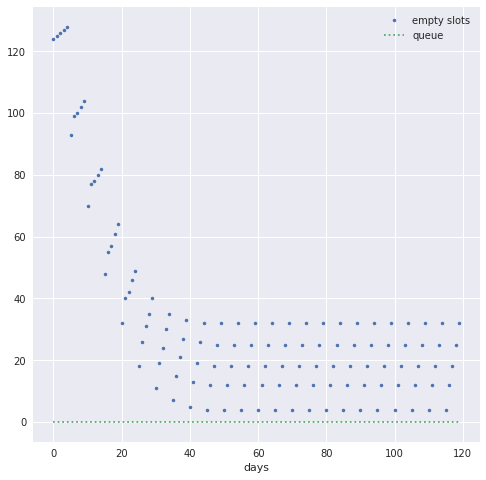

In [13]:
plt.figure(figsize=(8,8))
plt.plot(linac.empty_slots, '.', label='empty slots')

plt.plot(linac.queue, ':', label='queue')
plt.xlabel('days')
plt.legend();

In [165]:
linac.max

135

In [135]:
gaps =np.load('gap_freq.npy')

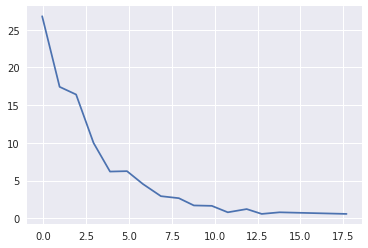

In [136]:
# 0.5 because the trace was from a histogram with the first bar having a center at 0.5
plt.plot(gaps[:,0]-0.5,gaps[:,1])

In [8]:
from scipy.optimize import curve_fit

gaps =np.load('gap_freq.npy')
(a,λ), pcov = curve_fit(lambda days,a,λ: a*np.exp(-λ*days),gaps[:,0]-0.5,gaps[:,1], p0 = (30,0.05))

adder = lambda s1, s2: s1 + s2
df4.fractions = df4.fractions.combine( pd.Series((np.random.exponential(1/λ,df4.shape[0])).astype('int') ), adder )

In [139]:
(a,λ), pcov = curve_fit(lambda days,a,λ: a*np.exp(-λ*days),gaps[:,0]-0.5,gaps[:,1], p0 = (30,0.05))

a, λ 

(25.83765955569498, 0.30727239048379573)

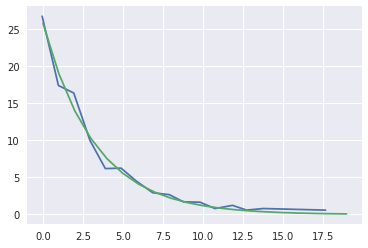

In [140]:
plt.plot(gaps[:,0]-0.5,gaps[:,1])
days = np.arange(20)
plt.plot(days, a*np.exp(-λ*days))

In [35]:
delays = (a*np.exp(-λ*days)).astype('int')


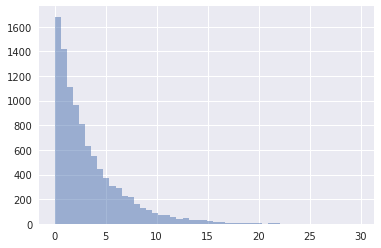

In [103]:
plt.hist(np.random.exponential(1/λ,10000), bins = 50, alpha = 0.5);

In [119]:
#df4.fractions + pd.DataFrame(np.random.exponential(1/λ,df4.shape[0]))

adder = lambda s1, s2: s1 + s2
df4.fractions = df4.fractions.combine( pd.Series((np.random.exponential(1/λ,df4.shape[0])).astype('int') ), adder )

In [6]:
(np.random.exponential(1/0.307,10000)).mean()

3.194465734701963

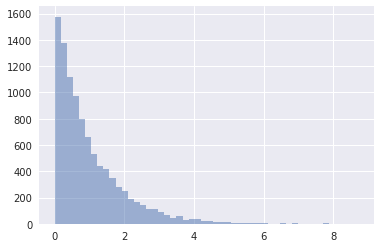

In [5]:
plt.hist(np.random.exponential(1,10000), bins = 50, alpha = 0.5);